In [1]:
%pip install qiskit==1.2.4
%pip install qiskit-aer==0.15.1
%pip install pylatexenc==2.10


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [40]:
from qiskit import QuantumCircuit
from qiskit.converters import circuit_to_gate
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Operator
from qiskit import transpile 
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

# Deutsch's algorithm
# Given an unknown function f : {0,1} -> {0,1}, work out whether it is constant
# or balanced.

# There are four possible functions:
#
# f0 is constant 0
# f1 is constant 1
# f2 is the identity
# f3 is negation

# Deutsch's algorithm works with F, a quantum version of f, defined by
#
# F|x>|y> = |x>|f(x) XOR y>
#
# Explicitly define F0, F1, F2, F3 as circuits and convert them to gates.

# F0 |x>|y> = |x>|y> so it's the identity function

F0_circuit = QuantumCircuit(2)
F0 = circuit_to_gate(F0_circuit,label="F0")

# F1 |x>|y> = |x>|NOT(y)> so it's implemented by applying X(y)

F1_circuit = QuantumCircuit(2)
F1_circuit.x(1)
F1 = circuit_to_gate(F1_circuit,label="F1")

# F2 |x>|y> = |x>|x XOR y>. Work out how to implement it as a circuit

F2_circuit = QuantumCircuit(2)
# Add a gate to F2_circuit so that the function F2 is correctly implemented
# Remember that numbering of qubits starts from the right
F2 = circuit_to_gate(F2_circuit,label="F2")

# F3 |x>|y> = |x>|NOT(x) XOR y>. Work out how to implement it as a circuit

F3_circuit = QuantumCircuit(2)
# Add gates to F3_circuit so that the function F3 is correctly implemented
# Remember that numbering of qubits starts from the right
F3 = circuit_to_gate(F3_circuit,label="F3")

In [50]:
# Choose which function we want to analyse

F = F3

In [ ]:
# Check that F is implemented correctly
# In this cell and the next three, make sure you understand why your
# definition of F is correct (or not).
# Test on |00>
test = QuantumCircuit(2) 
test.append(F,[0,1]) 
state = Statevector.from_int(0, 4) # 4 basis states on 2 qubits 
state = state.evolve(test) 
state.draw("latex")

In [ ]:
# Test on |01>
test = QuantumCircuit(2) 
test.x(0) # Remember that numbering of qubits starts from the right
test.append(F,[0,1]) 
state = Statevector.from_int(0, 4) # 4 basis states on 2 qubits 
state = state.evolve(test) 
state.draw("latex")

In [ ]:
# Test on |10>
test = QuantumCircuit(2) 
test.x(1) # Remember that numbering of qubits starts from the right
test.append(F,[0,1]) 
state = Statevector.from_int(0, 4) # 4 basis states on 2 qubits 
state = state.evolve(test) 
state.draw("latex")

In [ ]:
# Test on |11>
test = QuantumCircuit(2) 
test.x(0)
test.x(1) 
test.append(F,[0,1]) 
state = Statevector.from_int(0, 4) # 4 basis states on 2 qubits 
state = state.evolve(test) 
state.draw("latex")

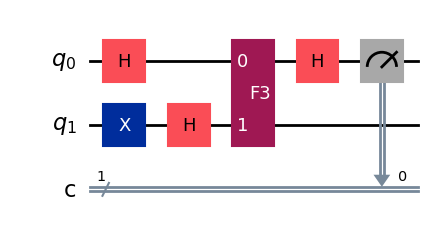

In [51]:
# The circuit for Deutsch's algorithm
# There are two qubits but we don't use them as inputs, just start them at |0>
# and manipulate them.
# One classical bit is used to capture the measurement result.
# Fill in the gaps to implement Deutsch's algorithm.

deutsch = QuantumCircuit(2,1)
# Add gates here to prepare the state that we want to apply F to
deutsch.append(F,[0,1]) 
# Add a gate and a measurement here to complete the circuit
deutsch.draw("mpl")

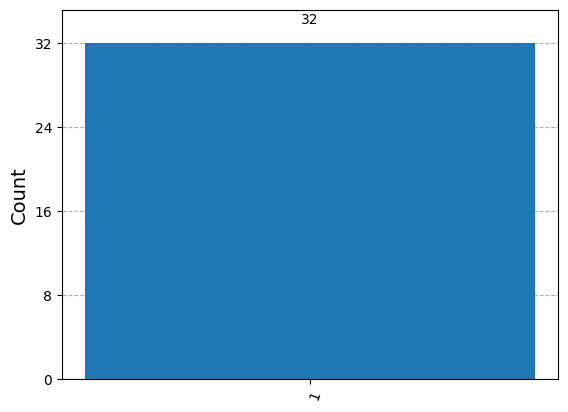

In [52]:
# Now simulate and plot the results.
# If f is constant (that is, F0 or F1) the result should always be 0.
# if f is balanced (that is, F2 or F3) the result should always be 1.

backend = BasicSimulator()
compiled = transpile(deutsch, backend)
job_sim = backend.run(compiled, shots=32)
result_sim = job_sim.result()
counts = result_sim.get_counts(compiled)
plot_histogram(counts)